In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [28]:
# Membaca dataset
data = pd.read_csv(r'C:\Documents\Data\Project Data Science Healthcare Stroke\healthcare-dataset-stroke-data.csv')

In [29]:
# Pembersihan data: mengisi nilai kosong pada kolom 'bmi' dengan median
data['bmi'].fillna(data['bmi'].median(), inplace=True)

C:\Users\fadhi\AppData\Local\Temp\ipykernel_10588\1390121244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(), inplace=True)


In [30]:
# Mengecek nilai kosong
print("Jumlah nilai kosong per kolom:")
print(data.isnull().sum())

Jumlah nilai kosong per kolom:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [31]:
# Memilih fitur dan target
X = data[['age', 'stroke']].values
y = data['heart_disease'].values

Memilih kolom fitur (age dan stroke) untuk dijadikan input (X) dan kolom target (heart_disease) sebagai output (y).
X (Fitur) berisi dua variabel yang akan digunakan untuk memprediksi kemungkinan seseorang memiliki penyakit jantung.
y (Target) berisi label yang menunjukkan apakah seseorang memiliki penyakit jantung atau tidak.

In [32]:
# Normalisasi fitur
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

Melakukan normalisasi atau standarisasi data menggunakan StandardScaler().
Agar semua fitur memiliki skala yang sama, terutama jika terdapat perbedaan besar dalam nilai antar fitur. StandardScaler() mengubah data menjadi distribusi dengan mean = 0 dan standar deviasi = 1.

Pemisahan Data

In [33]:
# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

Memisahkan data menjadi data set pelatihan dan pengujian bertujuan untuk melatih model mengenali pola data serta mengukur kinerjanya pada data baru. Langkah ini penting untuk memastikan model dapat menggeneralisasi, menghindari overfitting, dan menghasilkan prediksi yang handal di dunia nyata.

- Gunakan  presentasi  70%:30%  jika  dataset  berukuran  sedang  hingga  besar, karena seimbang antara pelatihan dan pengujian 
- Pilih presentase 80:20% untuk dataset kecil agar memaksimalkan data pelatihan 
- Dan gunakan 50%:50% hanya jika dataset sangat besar atau elevasi model memerlukan data pengujian yang banyak

karena dataset yang digunakan < 10.000 baris, < 50 kolom maka dikategorikan Dataset kecil

KNN (K-Nearest  Neighbors)

KNN (K-Nearest  Neighbors) adalah algoritma Machine Learning yang digunakan untuk klasifikasi dan regresi. Prinsip kerjanya adalah dengan mencari “k” data terdekat dari titik data yang diprediksi, kemudian mengklasifikasikannya berdasarkan mayoritas 
label  atau  menghitung  nilai  rata-rata  dari  K  tetangga  terdekat.  KNN  bersifat  non parametik, artinya tidak mengasumsikan bentuk distribusi data tertentu, dan sering digunakan dalam tugas pengenalan pola dan rekomendas

In [49]:
# Model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
# Memprediksi pada data pengujian
y_pred = knn.predict(X_test)

In [36]:
# Menampilkan hasil evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[960   2]
 [ 59   1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       962
           1       0.33      0.02      0.03        60

    accuracy                           0.94      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.91      0.94      0.91      1022



- confusion_matrix(y_test, y_pred): Menghasilkan confusion matrix, yaitu matriks yang menunjukkan jumlah prediksi yang benar dan salah.
- classification_report(y_test, y_pred): Menampilkan metrik evaluasi, termasuk precision, recall, f1-score, dan accuracy.

Confusion Matrix :
- 960 - Prediksi benar untuk kelas 0 (True Negative)
- 2 - Prediksi salah, seharusnya kelas 1 tetapi diprediksi sebagai kelas 0 (False Negative)
- 59 - Prediksi salah, seharusnya kelas 0 tetapi diprediksi sebagai kelas 1 (False Positive)
- 1 - Prediksi benar untuk kelas 1 (True Positive)

Classification Report :
- Precision (Kelas 1): 0.33 → Dari semua prediksi kelas 1, hanya 33% yang benar.
- Recall (Kelas 1): 0.02 → Dari semua data yang benar-benar kelas 1, hanya 2% yang terdeteksi dengan benar.
- F1-score: Kombinasi precision dan recall. Hasilnya sangat rendah untuk kelas 1, menandakan model tidak bekerja dengan baik dalam mendeteksi kelas minoritas.
- Akurasi (Accuracy): 94% → Model secara keseluruhan akurat, tetapi ada ketidakseimbangan dalam klasifikasi kelas 1.

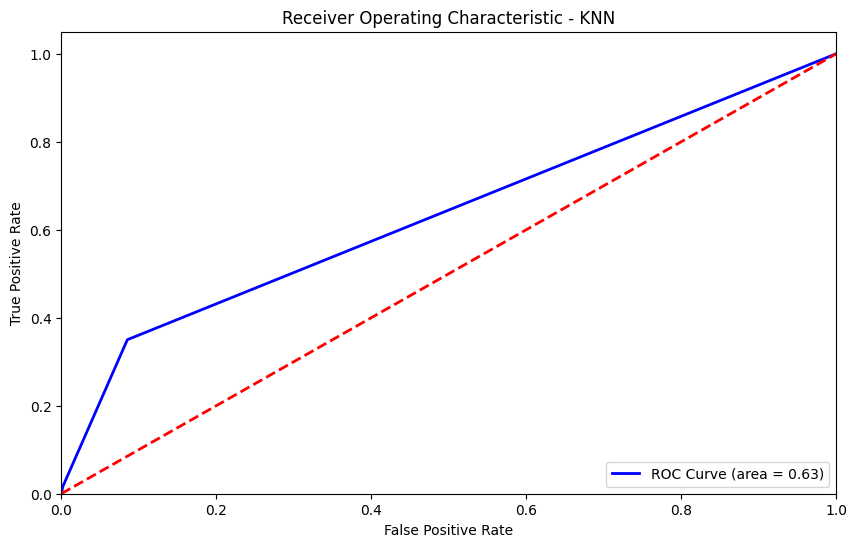

In [37]:
# Menghitung probabilitas untuk ROC Curve
y_scores = knn.predict_proba(X_test)[:, 1]

# Menghitung kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Menggambar ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc='lower right')
plt.show()

ROC Curve digunakan untuk mengevaluasi kinerja model klasifikasi, terutama dalam masalah klasifikasi biner. ROV Curve menggambarkan hubungan antara True Positive Rate(TPR) dan False Positive Rate(FPR)

- Garis Diagonal Putus-putus Merah: Garis ini merepresentasikan model klasifikasi acak atau model yang tidak memiliki kemampuan prediksi yang lebih baik daripada tebakan acak. Semakin dekat kurva ROC model ke garis diagonal ini, berarti semakin buruk pula kinerja model tersebut.
- Garis Kurva Berwarna Biru: Kurva ini menunjukkan kinerja model klasifikasi KNN (K-Nearest Neighbors) pada berbagai ambang batas. Semakin tinggi dan curam kurva ini, semakin baik kinerja model dalam memisahkan kelas positif dan negatif.
- Angka Area Under the Curve (AUC): Angka 0.63 pada legenda grafik adalah nilai AUC. AUC adalah ukuran kinerja model klasifikasi secara keseluruhan. Nilai AUC berkisar antara 0 hingga 1. Semakin tinggi nilai AUC, semakin baik kinerja model. Dalam kasus ini, model KNN memiliki AUC sebesar 0.63, yang berarti model ini memiliki kinerja yang cukup baik dalam memisahkan kelas positif dan negatif.


True Positive Rate (TPR): Angka pada sumbu-Y menunjukkan proporsi data positif yang benar diprediksi positif. Misalnya, jika TPR = 0.8, berarti 80% data positif berhasil diprediksi dengan benar oleh model.
False Positive Rate (FPR): Angka pada sumbu-X menunjukkan proporsi data negatif yang salah diprediksi positif. Misalnya, jika FPR = 0.2, berarti 20% data negatif salah diprediksi sebagai positif oleh model.

Semakin tinggi nilai AUC, semakin baik kinerja model dalam memisahkan kelas positif dan negatif.

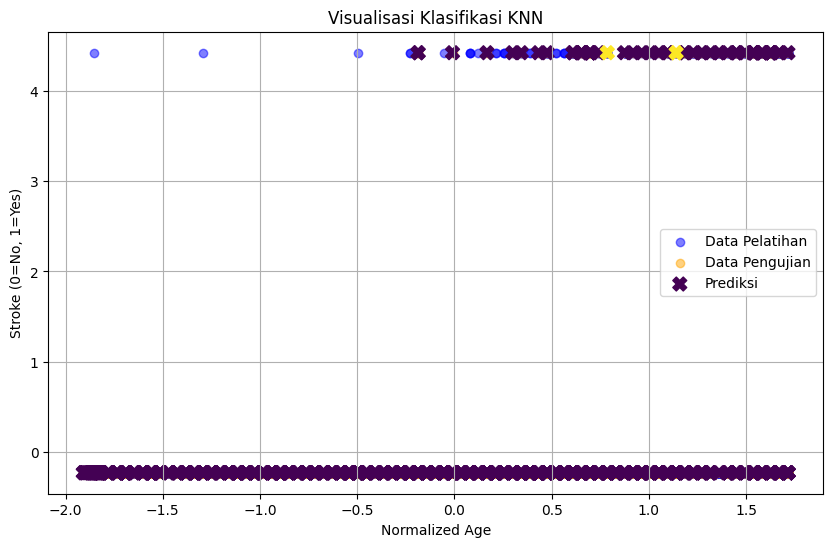

In [38]:
# Visualisasi hasil klasifikasi
plt.figure(figsize=(10, 6))

# Plot data pelatihan
plt.scatter(X_train[:, 0], X_train[:, 1], c='blue', label='Data Pelatihan', alpha=0.5)

# Plot data pengujian
plt.scatter(X_test[:, 0], X_test[:, 1], c='orange', label='Data Pengujian', alpha=0.5)

# Plot prediksi
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='X', label='Prediksi', s=100)

# Menambahkan label dan judul
plt.title('Visualisasi Klasifikasi KNN')
plt.xlabel('Normalized Age')
plt.ylabel('Stroke (0=No, 1=Yes)')
plt.legend()
plt.grid()
plt.show()

SVM (Support Vector Machine)

Support Vector Machine (SVM) adalah algoritma Machine Learning yang digunakan untuk klasifikasi dan regresi. SVM bekerja dengan mencari hyperplane terbaik yang memisahkan data ke dalam kelas-kelas berbeda dengan memaksimalkan margin antara data  terdekat  (support  vectors)  dari  masing-masing  kelas.  Jika  data  tidak  dapat dipisahkan secara linear, SVM menggunakan kernel trick untuk memetakan data ke ruang fitur berdimensi lebih tinggi.

In [ ]:
# Membuat model SVM
model = svm.SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [40]:
# Memprediksi probabilitas untuk set pengujian
y_scores = model.predict_proba(X_test)[:, 1]

In [41]:
# Menghitung kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

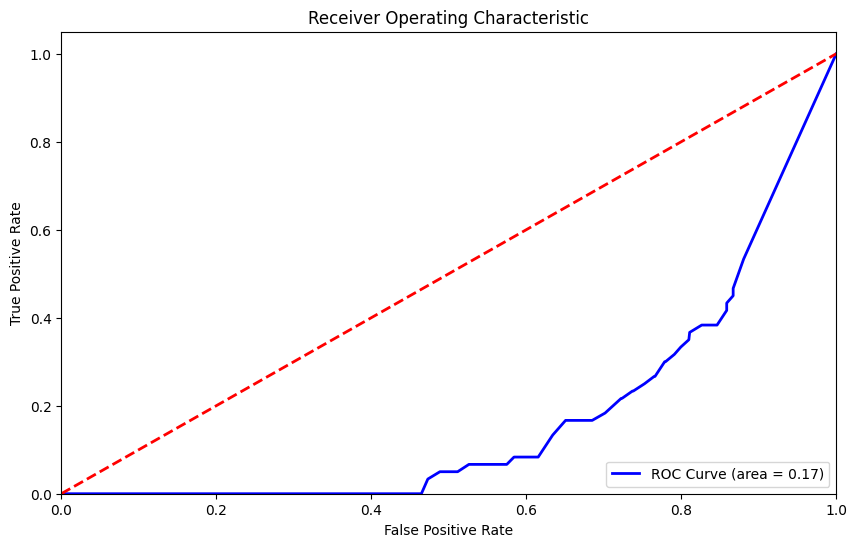

In [42]:
# Menggambar ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [43]:
# Mengambil koefisien untuk grafik hyperplane
w = model.coef_[0]
b = model.intercept_[0]

# Menghitung titik dan arah untuk membuat hyperplane
xx = np.linspace(X_train[:, 0].min(), X_train[:, 0].max())
yy = - (w[0] * xx + b) / w[1]

# Menghitung margin
margin = 1 / np.sqrt(np.sum(w ** 2))
yy_margin_upper = yy + margin
yy_margin_lower = yy - margin

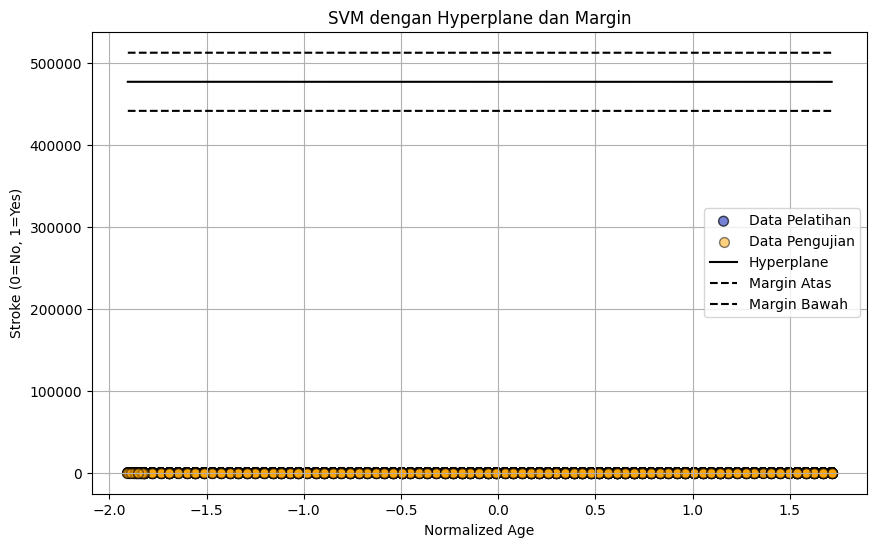

In [44]:
# Visualisasi
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='coolwarm', edgecolors='k', alpha=0.7, label='Data Pelatihan')
plt.scatter(X_test[:, 0], X_test[:, 1], c='orange', s=50, label='Data Pengujian', edgecolors='k', alpha=0.5)
plt.plot(xx, yy, 'k-', label='Hyperplane')
plt.plot(xx, yy_margin_upper, 'k--', label='Margin Atas')
plt.plot(xx, yy_margin_lower, 'k--', label='Margin Bawah')
plt.title('SVM dengan Hyperplane dan Margin')
plt.xlabel('Normalized Age')
plt.ylabel('Stroke (0=No, 1=Yes)')
plt.legend()
plt.grid()

Perbandingan KNN & SVM

In [50]:
# Model KNN
y_pred_knn = knn.predict(X_test)
y_scores_knn = knn.predict_proba(X_test)[:, 1]

# Model SVM
y_pred_svm = model.predict(X_test)
y_scores_svm = model.predict_proba(X_test)[:, 1]

In [51]:
# Evaluasi KNN
print("KNN - Classification Report")
print(classification_report(y_test, y_pred_knn))
auc_knn = roc_auc_score(y_test, y_scores_knn)
print(f"KNN - AUC: {auc_knn:.2f}\n")

KNN - Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       962
           1       0.33      0.02      0.03        60

    accuracy                           0.94      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.91      0.94      0.91      1022

KNN - AUC: 0.63



In [52]:
# Evaluasi SVM
print("SVM - Classification Report")
print(classification_report(y_test, y_pred_svm))
auc_svm = roc_auc_score(y_test, y_scores_svm)
print(f"SVM - AUC: {auc_svm:.2f}\n")

SVM - Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       962
           1       0.00      0.00      0.00        60

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.89      0.94      0.91      1022

SVM - AUC: 0.50



c:\Users\fadhi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\fadhi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\fadhi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [53]:
# Menampilkan hasil perbandingan
print("Perbandingan AUC:")
print(f"KNN: {auc_knn:.2f}")
print(f"SVM: {auc_svm:.2f}")

Perbandingan AUC:
KNN: 0.63
SVM: 0.50


In [54]:
# Membuat kesimpulan
if auc_knn > auc_svm:
    print("KNN memiliki performa lebih baik berdasarkan AUC.")
elif auc_knn < auc_svm:
    print("SVM memiliki performa lebih baik berdasarkan AUC.")
else:
    print("KNN dan SVM memiliki performa yang setara berdasarkan AUC.")

KNN memiliki performa lebih baik berdasarkan AUC.
